Julian McAuley Amazon Dataset http://cseweb.ucsd.edu/~jmcauley/
- Julian McAuley, Rahul Pandey, and Jure Leskovec. Inferring networks of substitutable and complementary products. In Proceedings of the International Conference on Knowledge Discovery and Data Mining, pages 785–794, 2015.
- Julian McAuley, Christopher Targett, Qinfeng Shi, and Anton van den Hengel. Image-based recommendations on styles and substitutes. In Proceedings of the International Conference on Research and Development in Information Retrieval, pages 43–52, 2015.

In [1]:
require(xtable,quietly = T)
source("DecodingFunctions.R")
options(warn=-1)

dsname <- "Amazon"
msg <- "Amazon Products"
load(paste(dsname,"df.RData", sep="/"))

In [3]:
nprods <- length(df$V)
nratings <- sum(df$nR)
avgRating <- mean(df$V)
avgRSR <- mean(df$RSR)
dfstats <- data.frame(nprods, nratings, avgRating, avgRSR)
  colnames(dfstats) <- c("Number of products", "Number of reviews", "Mean average rating", "mean RSR")
  row.names(dfstats) <- ""

xtable(x=dfstats, caption=paste("Data summary for", msg), digits=10, comment=FALSE)

,Number of products,Number of reviews,Mean average rating,mean RSR
,4257624,45479634,3.869265,0.4176705


In [4]:
#Run this only if you have time!
linModels(df, dsname)

In [5]:
#Run this only if you have time!
#rndLinModels(df, dsname, nrep=10000, verbose=FALSE)
#bootLinModels(df, dsname, nrep=10000, verbose=FALSE)

In [6]:
#Run this only if you have time!
calcPlotDataSimple(df, dsname)
load(file=paste(dsname, "PlotDataSimple.RData", sep="/"))
load(file=paste(dsname, "RndEsts.RData", sep="/"))
load(file=paste(dsname, "Boot.RData", sep="/"))

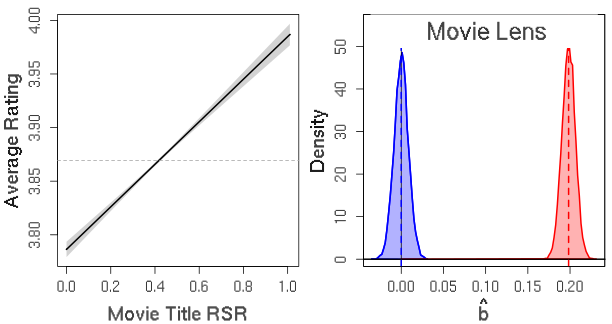

In [7]:
options(repr.plot.width=8.5, repr.plot.height=4.5)
options(jupyter.plot_mimetypes = 'image/svg+xml')
plotLM(plotData, rests, bests, xlab="Movie Title RSR", ylab="Average Rating", booted=TRUE, coords=c(mean(df$RSA), mean(df$V)))
legend(x="top","Movie Lens", box.lty=0, box.lwd=0, bg="white", cex=2)

In [8]:
dfcontrols <- data.frame(df$nameLen, df$nwords, df$avgLetterFreq, df$avgWordFreq, df$nR)
linModelsControl(df$V, df$RSR, dfcontrols, dsname)

In [9]:
load(paste(dsname,"LinModel.RData", sep="/"))
load(paste(dsname,"LinModelNorm.RData", sep="/"))
load(file=paste(dsname,"LinModelRobust.RData",sep="/"))
load(file=paste(dsname,"LinModelControl.RData",sep="/"))

In [10]:
suppressMessages(library(texreg)) #by Philip Leifeld (University of Konstanz) see his JSS article
suppressMessages(library(stargazer))

names(linModel$coefficients) <- c( "1", "RSR")
names(linModelNorm$coefficients) <- c( "1", "RSR")
names(linModelRobust$coefficients) <- c( "1", "RSR")
names(linModelControl$coefficients) <- c( "1", "RSR")



In [11]:
stargazer(linModel, linModelNorm, linModelRobust,linModelControl, style="asr", digits=4, keep.stat=c("rsq", "n"), model.numbers=F, omit.table.layout="dm", column.labels=c("OLS", "Normalized", "Robust (MM)", "Residualized"), title=paste("Regression results for", msg), digit.separator=".", type="text")


Regression results for Amazon Products
-------------------------------------------------
       OLS    Normalized Robust (MM) Residualized
-------------------------------------------------
1   3.7864***   0.0000    4.3380***   -0.0305*** 
RSR 0.1984*** 0.0112***   0.1384***   0.0730***  
N   4.257.624 4.257.624   4.257.624   4.257.624  
R2   0.0001     0.0001     0.0003      0.00002   
-------------------------------------------------
*p < .05; **p < .01; ***p < .001                 


In [12]:
load(file=paste(dsname,"LinModel.RData",sep="/"))
load(file=paste(dsname,"LinModelRobust.RData",sep="/"))
load(file=paste(dsname,"RndEsts.RData",sep="/"))
load(file=paste(dsname,"Boot.RData",sep="/"))
load(file=paste(dsname,"SpearmanBoot.RData",sep="/"))
statsTable(dsname, linModel, bests, rests, rhoests, linModelRobust, msg=msg)

,t test p-value,bootstrap p-value,permutation p-value,Spearman p-value,robust p-value
,2.609294e-118,0,0,0,5.846878e-249
